In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import pymc3 as pm
import theano

In [26]:
PAIR_ELTS = ('st', 'sp', 'tw', 'th', 'li', 'ds', 'ch', 'ju')
DANCE_ELTS = ('tw', 'st', 'pd', 'li', 'l2', 'sp', 'ch')
COMP_TYPES = ('ss', 'tr', 'pe', 'co', 'in')

In [53]:
PAIR_PRIORS = (('st', 3.0), ('sp', 3.5), ('tw', 5.0), ('th', 4.0), ('li', 6.0), ('ds', 4.0), ('ch', 2.0), ('ju', 3.0))
DANCE_PRIORS = (('tw', 6.0), ('st', 7.0), ('pd', 4.0), ('li', 4.0), ('l2', 8.0), ('sp', 4.0), ('ch', 2.0))

In [54]:
PRIORS = DANCE_PRIORS

In [49]:
def plot_trace(trace, label):
    pm.traceplot(trace)
    plt.show()

    estimates = pd.Series(trace['mu_' + label].mean(axis=0), index=skaters)
    se = pd.Series(trace['mu_' + label].std(axis=0), index=skaters)

    order = estimates.sort_values().index
    plt.scatter(xrange(len(estimates)), estimates[order])
    for i, m, s in zip(range(len(estimates)), estimates[order], se[order]):
        plt.plot([i,i], [m-s, m+s], 'b-')
    plt.ylabel(label + ' Points'); plt.xlabel('Ordered Skater');
    plt.show()

In [50]:
elements = pd.read_csv('pd_data/elements_dance.csv')
skaters = sorted(elements.skater.unique())
num_skaters = len(skaters)
skater_lookup = dict(zip(skaters, xrange(len(skaters))))

elements18 = pd.read_csv('pd_data/elements_dance18.csv')
elements18['skater_code'] = elements18.apply(lambda row: skater_lookup.get(row.skater, -1), axis=1)

In [51]:
results = {}  # dict of (trace, model, shared_vars)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:10<00:00, 90.99it/s]


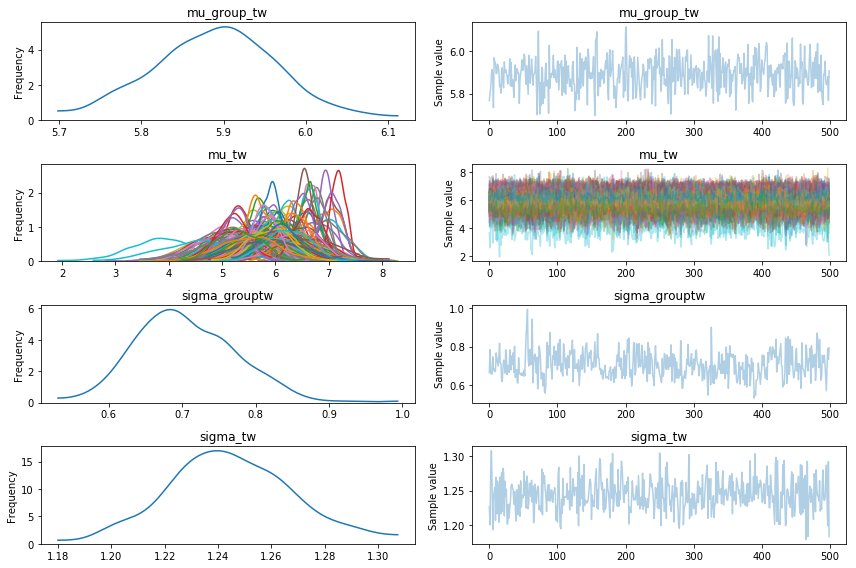

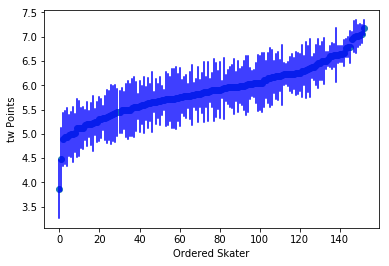

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 114.76it/s]


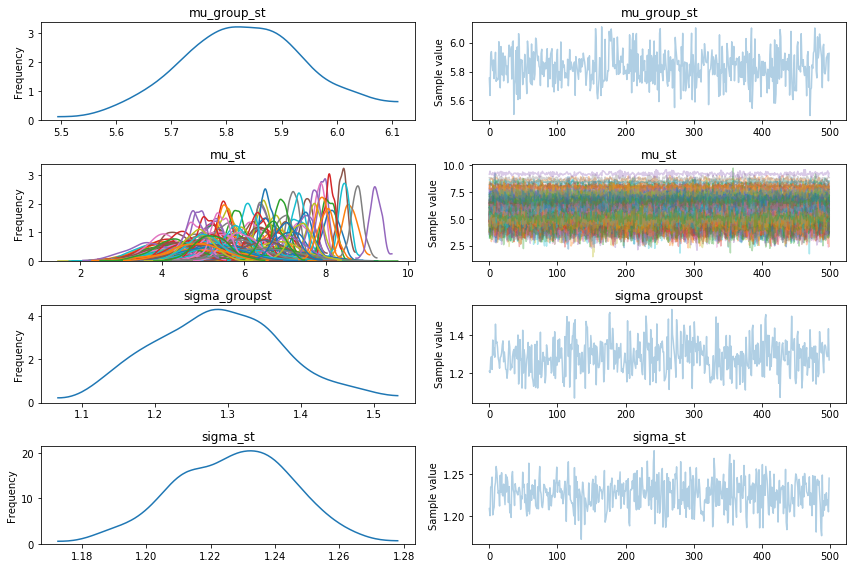

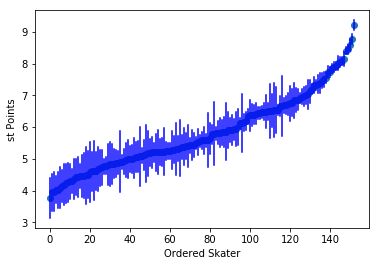

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 119.72it/s]


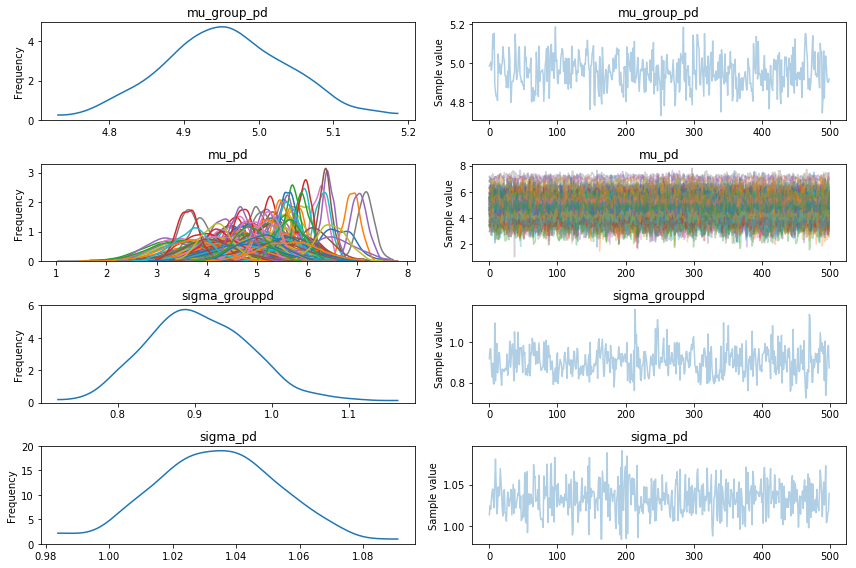

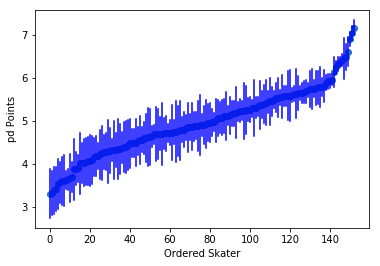

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:12<00:00, 78.19it/s]


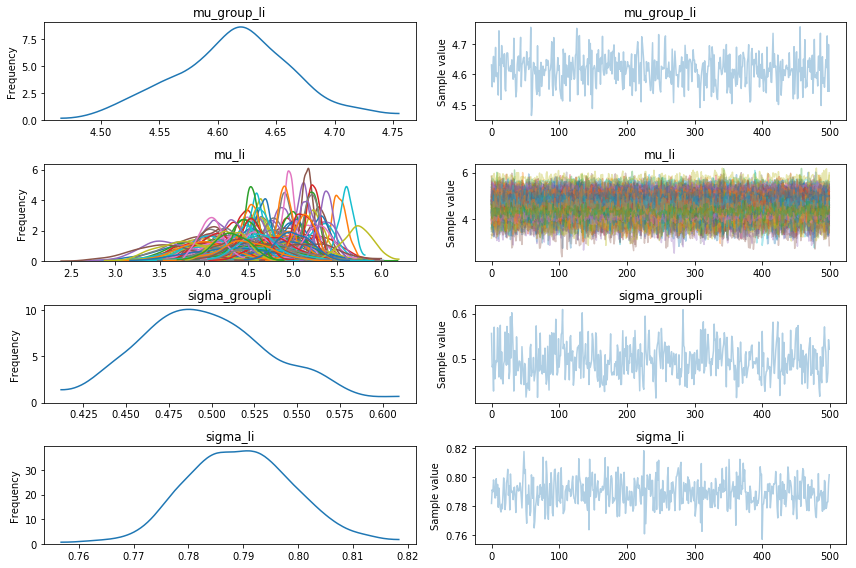

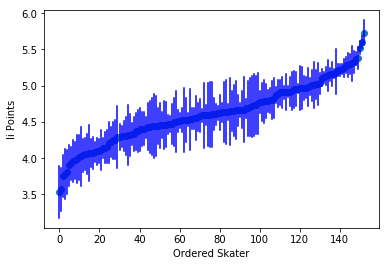

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 120.30it/s]


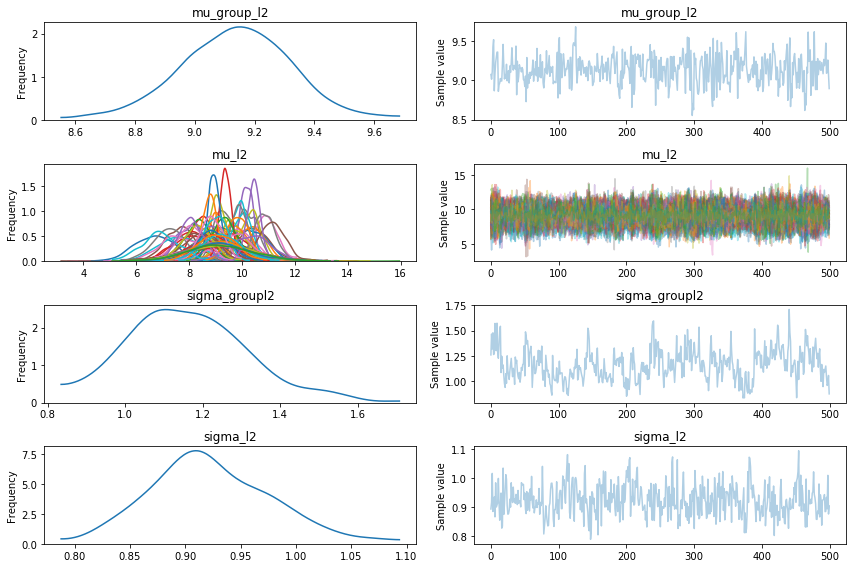

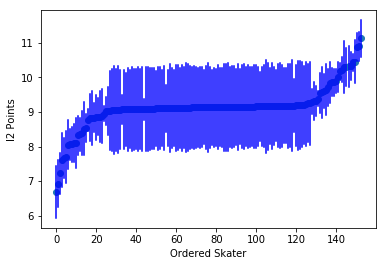

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 124.15it/s]


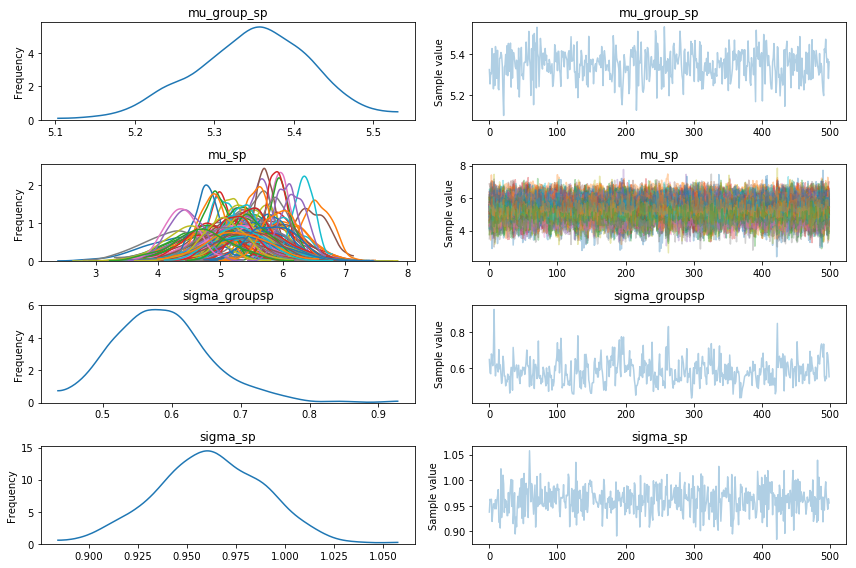

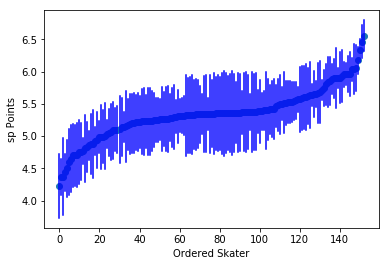

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 123.83it/s]


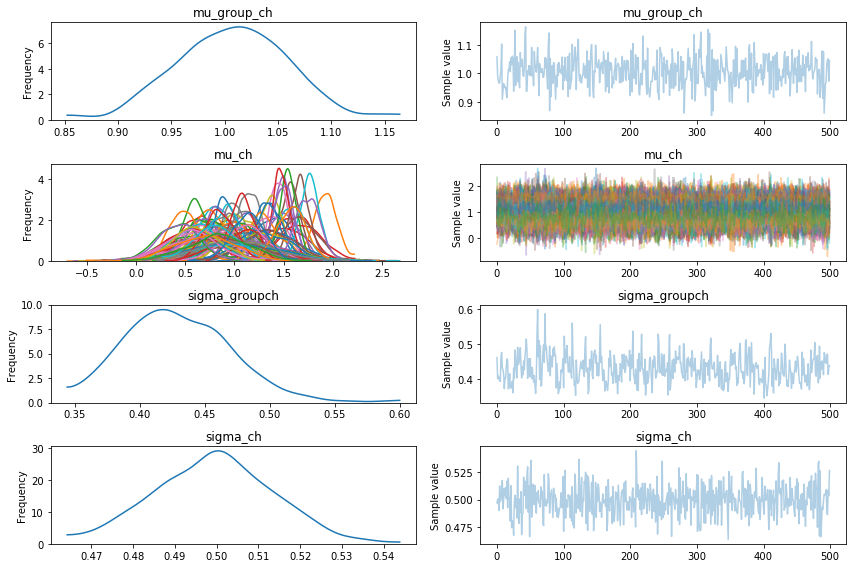

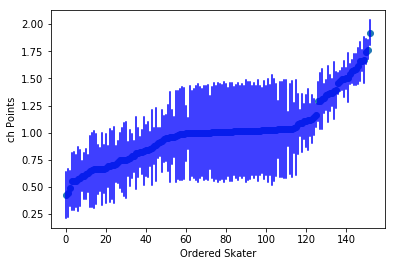

In [55]:
for elt_type, prior_mu in PRIORS:
    elts = elements[elements.elt_type == elt_type]
    skater = elts['skater_code'] = elts.skater.replace(skater_lookup).values
    skater = theano.shared(skater)
    points = elts.points
    
    model = pm.Model()
    with model:
        mu_g = pm.Normal('mu_group_' + elt_type, prior_mu, sd=1e5)
        sigma_g = pm.HalfCauchy('sigma_group' + elt_type, 5)
        
        mu = pm.Normal('mu_' + elt_type, mu=mu_g, sd=sigma_g, shape=num_skaters)
        sigma = pm.HalfCauchy('sigma_' + elt_type, 5)
        y = pm.Normal('y_' + elt_type, mu[skater], sd=sigma, observed=points)

    with model:
        trace = pm.sample()

    results[elt_type] = (trace, model, skater)
    plot_trace(trace, elt_type)

In [56]:
components = pd.read_csv('pd_data/components_summary_dance.csv')
skaters = sorted(components.skater.unique())
num_skaters = len(skaters)
skater_lookup = dict(zip(skaters, xrange(len(skaters))))

components18 = pd.read_csv('pd_data/components_summary_dance18.csv')
components18['skater_code'] = components18.apply(lambda row: skater_lookup.get(row.skater, -1), axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:08<00:00, 111.96it/s]


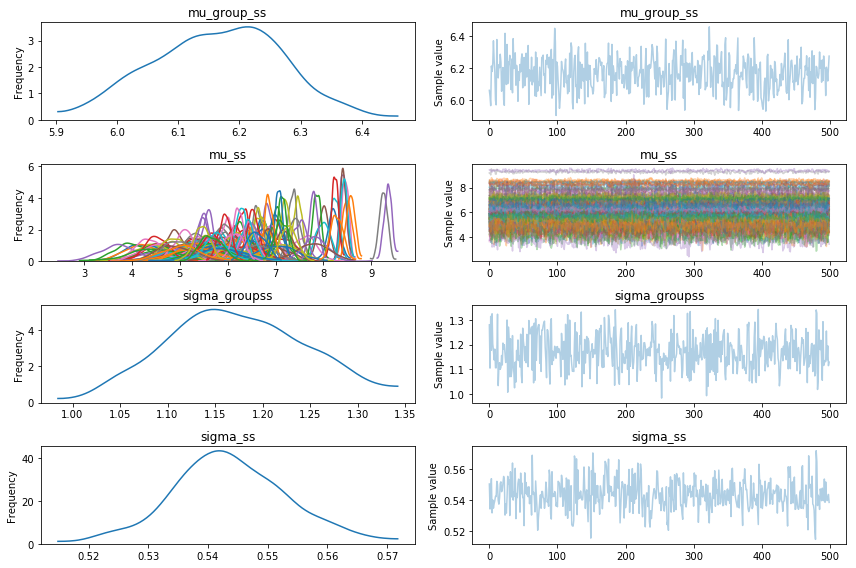

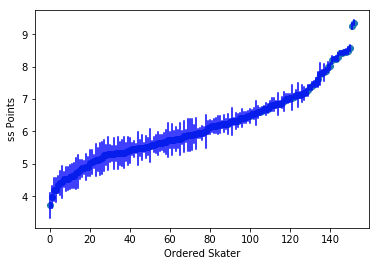

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:06<00:00, 151.09it/s]


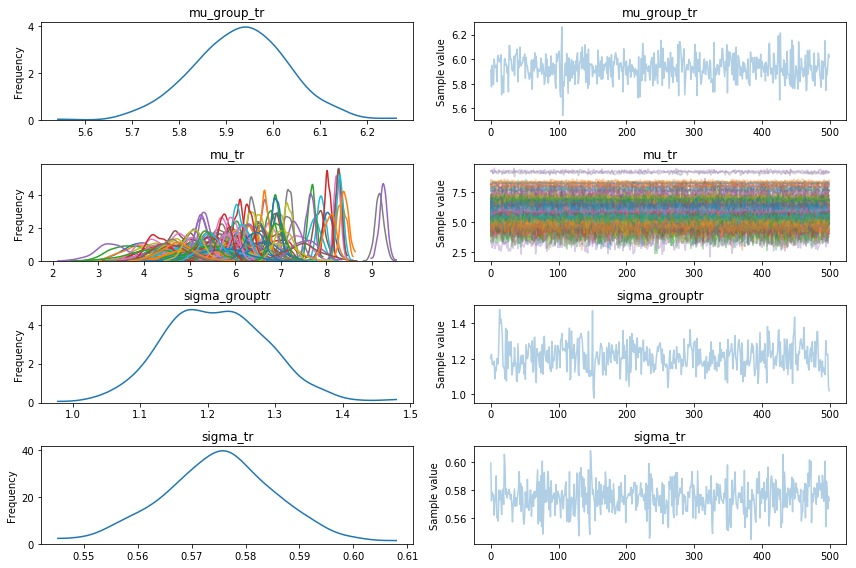

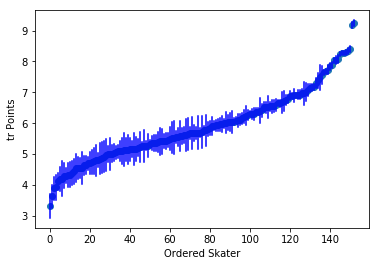

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:06<00:00, 154.31it/s]


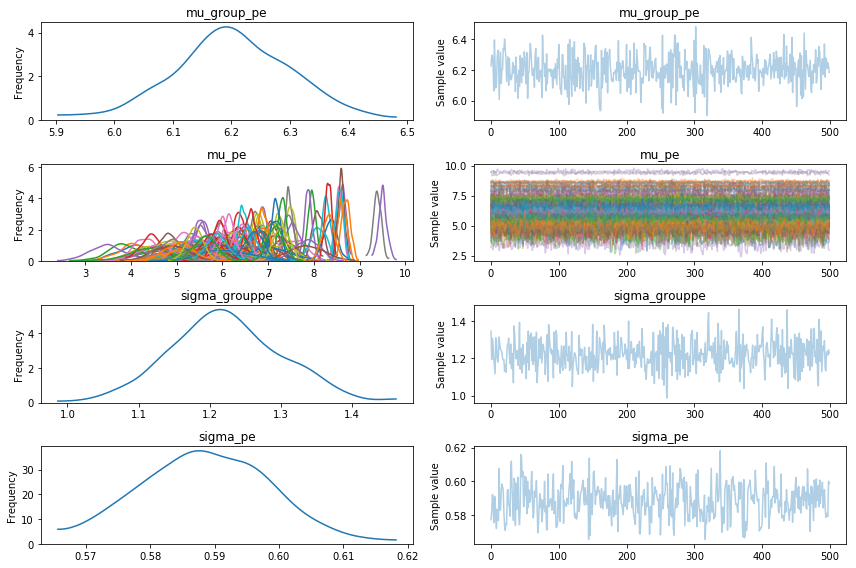

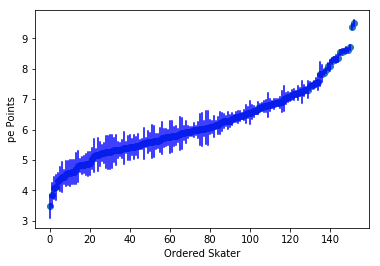

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:07<00:00, 141.94it/s]


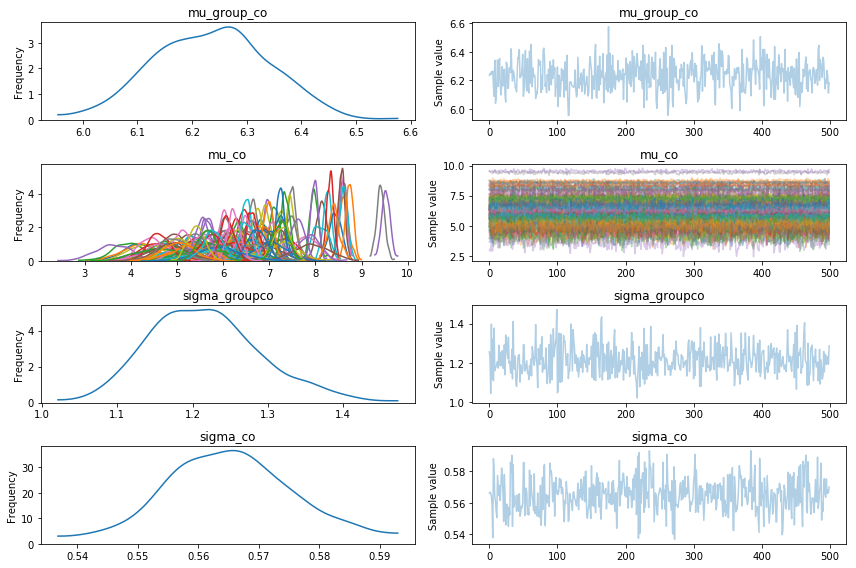

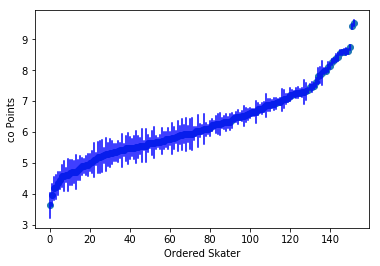

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:07<00:00, 141.98it/s]


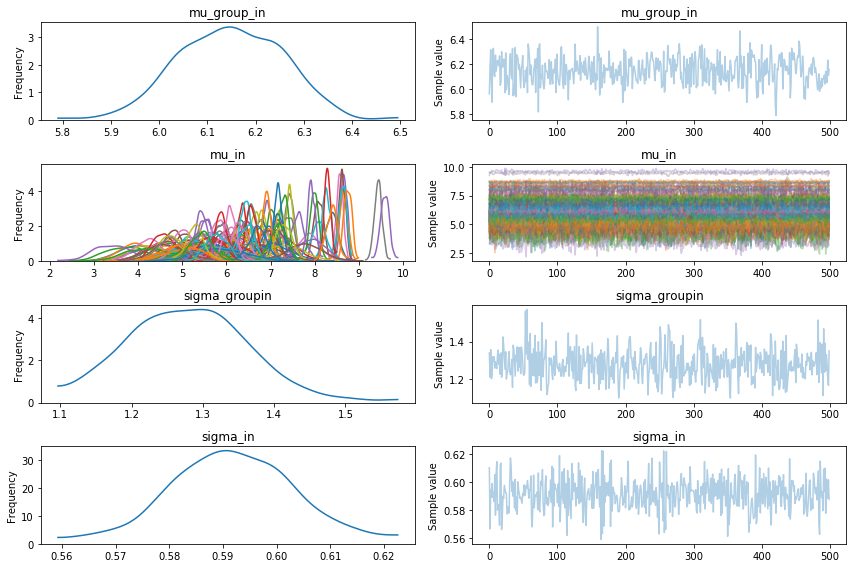

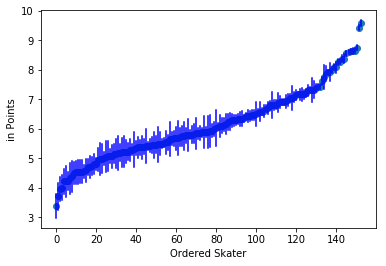

In [57]:
for comp_type in COMP_TYPES:
    comps = components[components.comp_type == comp_type]
    skater = comps['skater_code'] = comps.skater.replace(skater_lookup).values
    skater = theano.shared(skater)
    points = comps.points
    
    model = pm.Model()

    with model:
        mu_g = pm.Normal('mu_group_' + comp_type, 7.0, sd=1e5)
        sigma_g = pm.HalfCauchy('sigma_group' + comp_type, 5)
        
        mu = pm.Normal('mu_' + comp_type, mu=mu_g, sd=sigma_g, shape=num_skaters)
        sigma = pm.HalfCauchy('sigma_' + comp_type, 5)
        y = pm.Normal('y_' + comp_type, mu[skater], sd=sigma, observed=points)

    with model:
        trace = pm.sample()
    
    results[comp_type] = (trace, model, skater)
    plot_trace(trace, comp_type)

In [58]:
# Make predictions.
ppc = {}

In [59]:
for elt_type in DANCE_ELTS:
    trace, model, skater_var = results[elt_type]
    skater_var.set_value(
        np.asarray(elements18[elements18.elt_type == elt_type].skater_code)
    )
    ppc[elt_type] = pm.sample_ppc(trace, model=model, samples=500)['y_' + elt_type]

100%|██████████| 500/500 [00:00<00:00, 2189.64it/s]


In [60]:
for comp_type in COMP_TYPES:
    trace, model, skater_var = results[comp_type]
    skater_var.set_value(
        np.asarray(components18[components18.comp_type == comp_type].skater_code)
    )
    ppc[comp_type] = pm.sample_ppc(trace, model=model, samples=500)['y_' + comp_type]

100%|██████████| 500/500 [00:00<00:00, 1868.13it/s]


In [61]:
means = {}

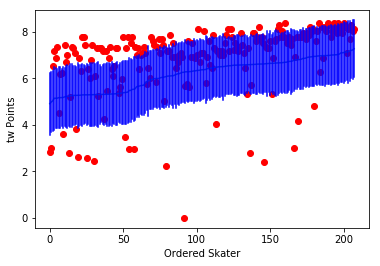

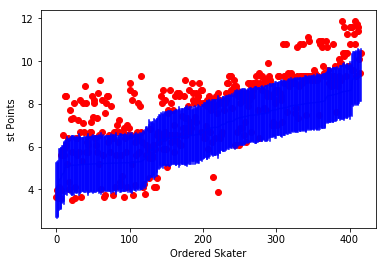

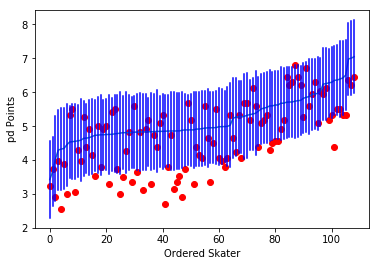

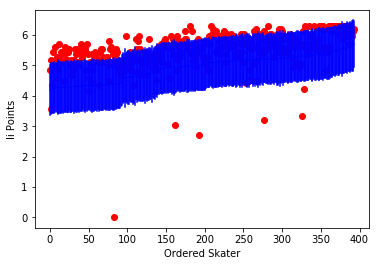

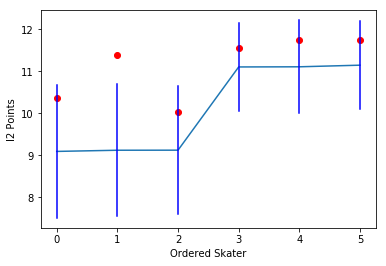

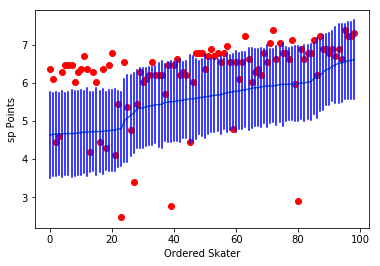

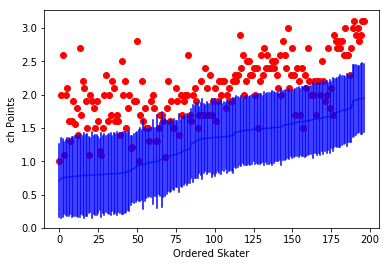

In [62]:
for elt_type in DANCE_ELTS:
    mean = ppc[elt_type].mean(axis=0)
    means[elt_type] = mean
    std = np.std(ppc[elt_type], axis=0)
    elts18type = elements18[elements18.elt_type == elt_type]
    order = pd.Series(mean).sort_values().index
    outcomes = []
    for index in order:
        outcomes.append(elts18type.iloc[index].points)
    plt.scatter(xrange(len(mean)), outcomes, color='r')
    plt.plot(xrange(len(mean)), [mean[x] for x in order])
    for i, m, s in zip(xrange(len(mean)), mean[order], std[order]):
        plt.plot([i,i], [m-s, m+s], 'b-')
    plt.ylabel(elt_type + ' Points');plt.xlabel('Ordered Skater');
    plt.show()

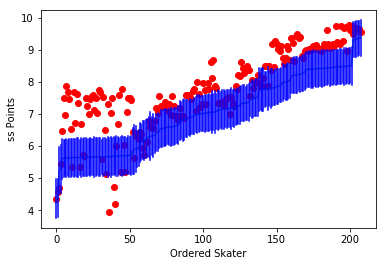

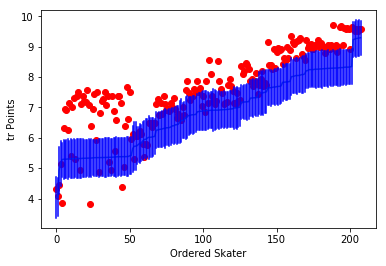

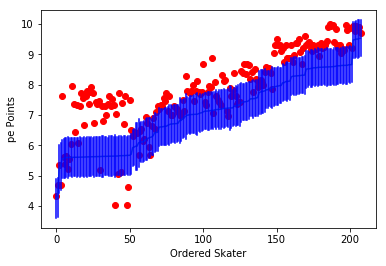

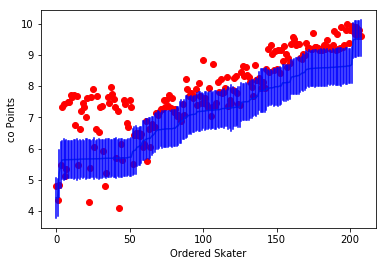

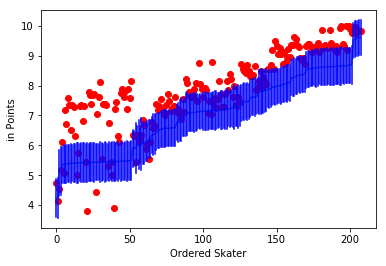

In [63]:
for comp_type in COMP_TYPES:
    mean = ppc[comp_type].mean(axis=0)
    means[comp_type] = mean
    std = np.std(ppc[comp_type], axis=0)
    comp18type = components18[components18.comp_type == comp_type]
    order = pd.Series(mean).sort_values().index
    outcomes = []
    for index in order:
        outcomes.append(comp18type.iloc[index].points)
    plt.scatter(xrange(len(mean)), outcomes, color='r')
    plt.plot(xrange(len(mean)), [mean[x] for x in order])
    for i, m, s in zip(xrange(len(mean)), mean[order], std[order]):
        plt.plot([i,i], [m-s, m+s], 'b-')
    plt.ylabel(comp_type + ' Points');plt.xlabel('Ordered Skater');
    plt.show()

In [64]:
elt_pred_col = []
elt_indices = {elt_type: 0 for elt_type in DANCE_ELTS}
for index, row in elements18.iterrows():
    elt_pred_col.append(means[row.elt_type][elt_indices[row.elt_type]])
    elt_indices[row.elt_type] += 1

In [65]:
comp_indices = {comp_type: 0 for comp_type in COMP_TYPES}
comp_pred_col = []
for index, row in components18.iterrows():
    comp_pred_col.append(means[row.comp_type][comp_indices[row.comp_type]])
    comp_indices[row.comp_type] += 1

In [66]:
elements18['prediction'] = elt_pred_col
components18['prediction'] = comp_pred_col

In [67]:
components18.rename(columns={'comp_type': 'elt_type'}, inplace=True)
elements18['is_elt'] = pd.Series([1] * len(elt_pred_col))
components18['is_elt'] = pd.Series([0] * len(comp_pred_col))

In [68]:
prediction = pd.concat([elements18, components18])

In [69]:
prediction.to_csv('fits/dance_predictions1.csv')

In [70]:
pair_elts = pd.read_csv('pd_data/elements_pairs.csv')